In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper')

gradient: 0.8897074648765879
shift to the left


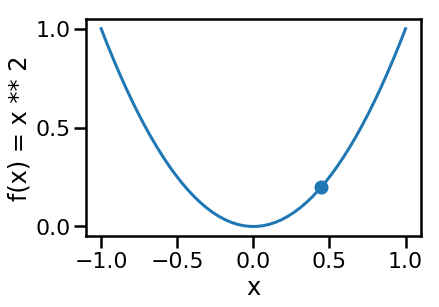

In [17]:
xs = np.linspace(start=-1, stop=1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f(x) = x ** 2')
x = np.random.uniform(-1, 1)
y = x ** 2
plt.scatter(x, y)

# adding tangent line; trouble getting to work
# xTangent = x
# yTangentLine = derivative * (xTangent)
# plt.plot(x, yTangentLine, linewidth=2, color='red')

derivative = 2 * x
print('gradient:', derivative)

if derivative > 0:
    print('shift to the left')
elif derivative < 1:
    print('shift to the right')
else:
    print(f'x={x} minimizes the value of this function')


In [18]:
# Linear Regression Gradient Descent
# Did another version of Gradient Descent to help understanding

plt.style.use(['ggplot'])

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X+np.random.randn(100,1)

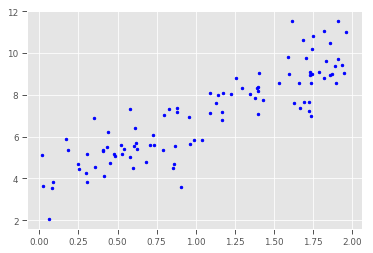

In [22]:
plt.plot(X, y, 'b.')

In [23]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.7210885 ]
 [3.10388555]]


In [25]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.7210885 ],
       [9.92885959]])

Text(0, 0.5, '$y$')

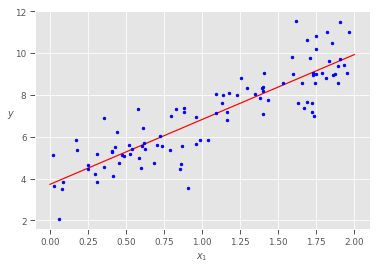

In [30]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

In [34]:
# Cost function for linear regression

def cal_cost(theta, X, y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2 * m) * np.sum(np.square(predictions - y))
    return cost

In [35]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for it in range(iterations):
        prediction = np.dot(X, theta)
        
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)
        
    return theta, cost_history, theta_history

In [36]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)

print('Theta0: {:0.3f}, \nTheta1: {:0.3f}'.format(theta[0][0], theta[1][0]))
print('final cost/MSE: {:0.3f}'.format(cost_history[-1]))

Theta0: 3.493, 
Theta1: 3.285
final cost/MSE: 4940.968


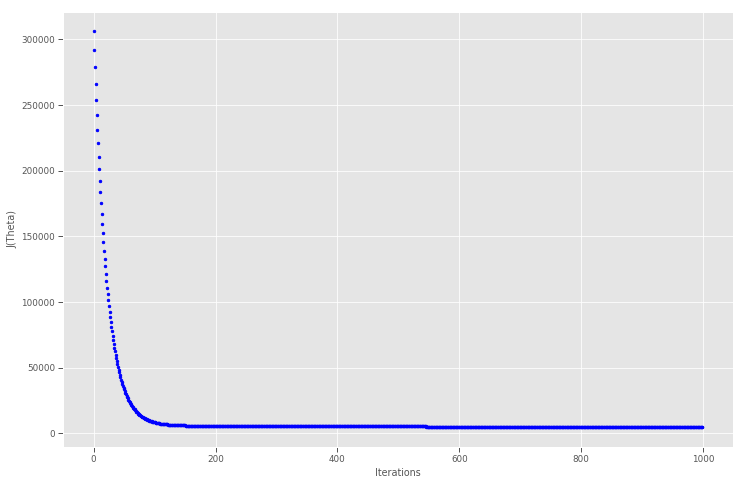

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_ = ax.plot(range(n_iter), cost_history, 'b.')

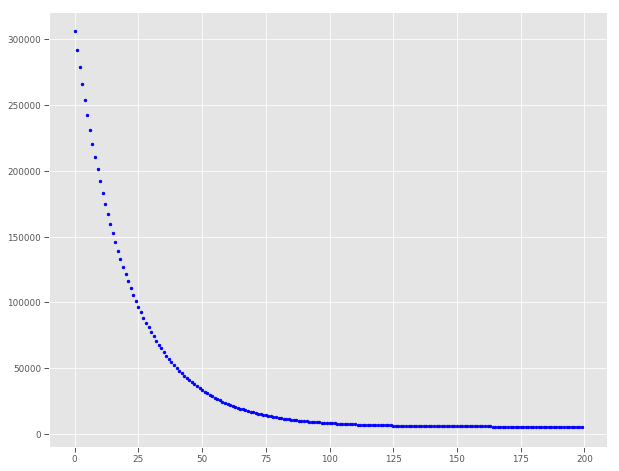

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.plot(range(200), cost_history[:200], 'b.')

In [40]:
def plot_GD(n_iter, lr, ax, ax1=None):
    _ = ax.plot(X, y, 'b.')
    theta = np.random.randn(2,1)
    
    tr = 0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = gradient_descent(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)
        
        cost_history[i] = h[0]
        
        if ((i % 25 == 0)):
            _ = ax.plot(X, pred, 'r-', alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
                
    if not ax1 == None:
        _ = ax1.plot(range(n_iter), cost_history, 'b.')

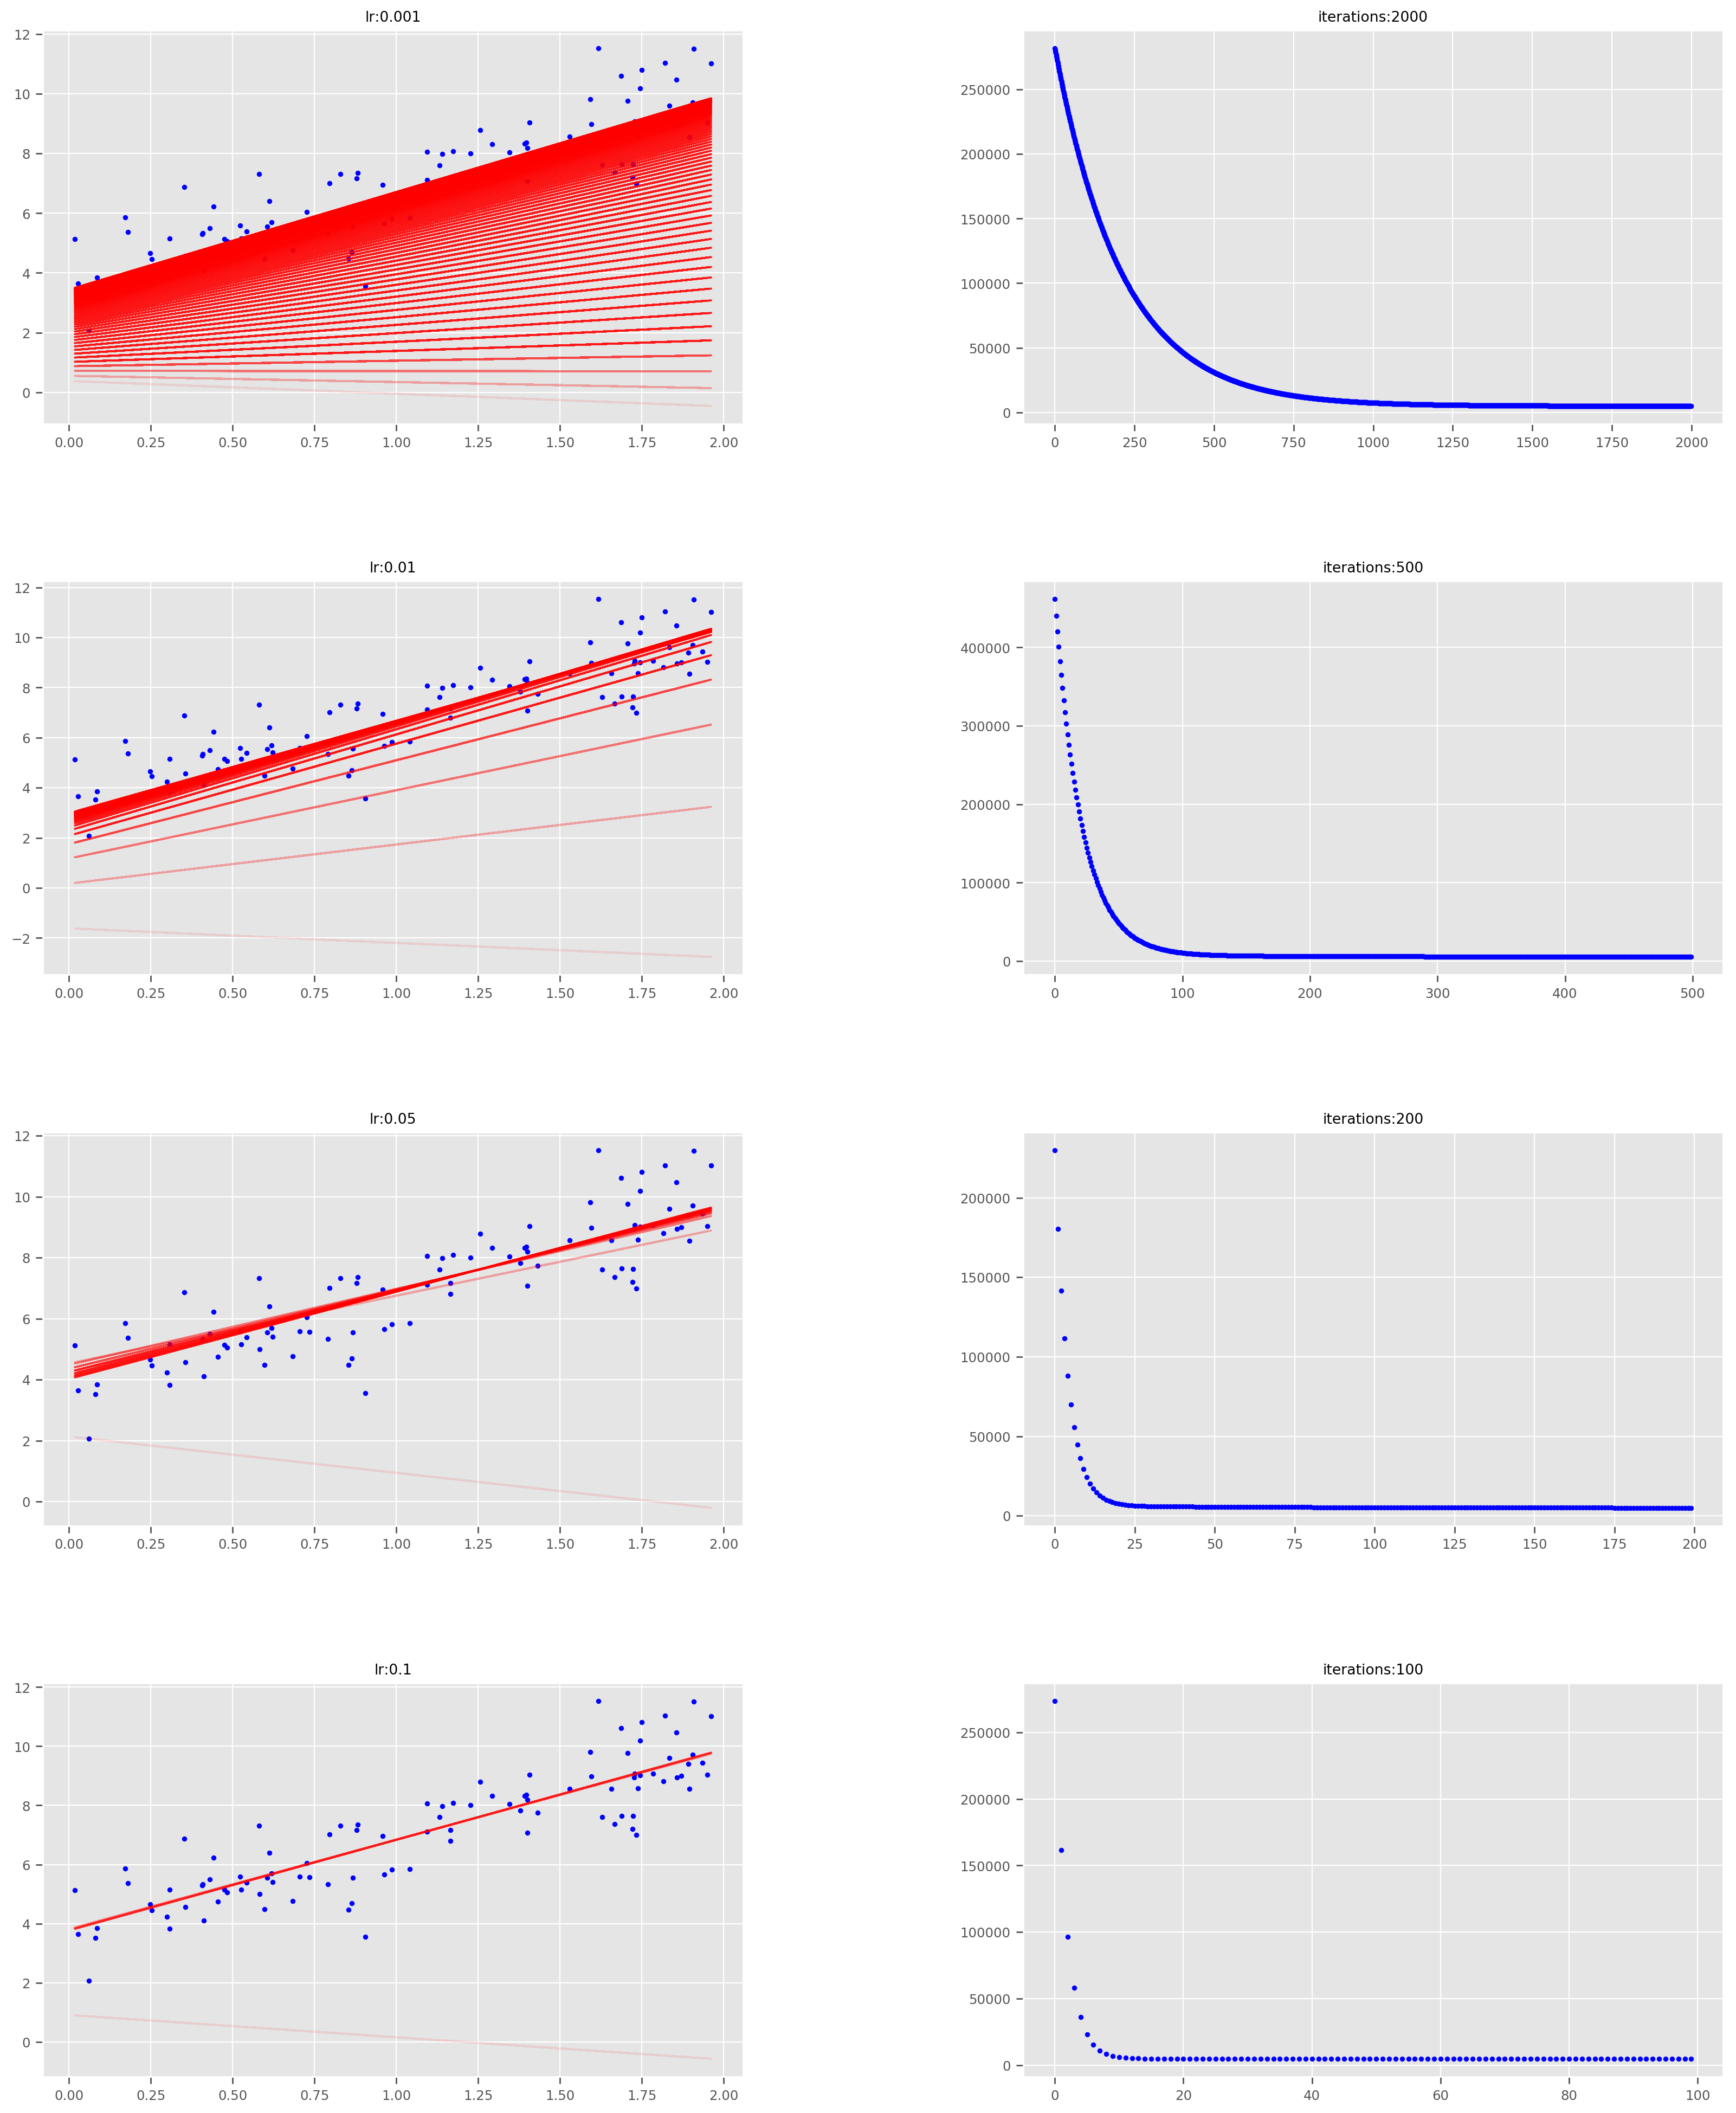

In [42]:
fig = plt.figure(figsize=(20,25), dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr = [(2000, 0.001), (500, 0.01), (200, 0.05), (100,0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
    
    ax1 = fig.add_subplot(4, 2, count)
    
    ax.set_title('lr:{}'.format(lr))
    ax1.set_title('iterations:{}'.format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)